In [1]:
from Kmeans import *
from Coreset import *
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = np.genfromtxt("data/bio_train.csv", delimiter=",")[:,3:]
data = MinMaxScaler().fit_transform(data)
labels_true = np.genfromtxt("data/bio_train.csv", delimiter=",")[:,0]

In [13]:
model = Kmeans(k=153, max_iters=400)
model.fit(data, init="random")
labels_computed = model.labels_
print(f"NMI: {NMI(labels_true, labels_computed)}")
errors_random = model.errors
losses_random = model.losses

 75%|███████▍  | 299/400 [07:41<02:35,  1.54s/it]
Kmeans converged. Exiting loop.

NMI: 0.20276941641244856



In [10]:
model = Kmeans(k=153, max_iters=400)
model.fit(data, init="firstk")
labels_computed = model.labels_
print(f"NMI: {NMI(labels_true, labels_computed)}")
errors_firstk = model.errors
losses_firstk = model.losses

 64%|██████▍   | 256/400 [06:37<03:43,  1.55s/it]
Kmeans converged. Exiting loop.

NMI: 0.2013254279734893



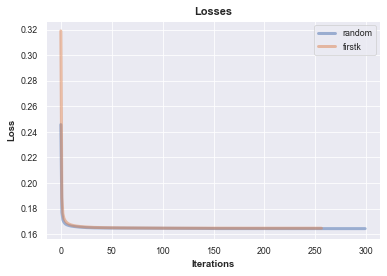

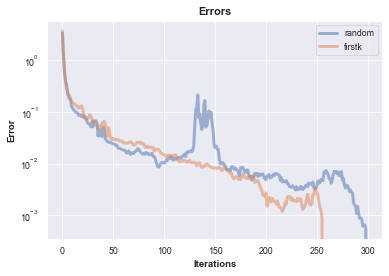

In [14]:
import seaborn as sns
sns.set_style('darkgrid')
sns.set(color_codes=True)
sns.set_context('paper')

plt.title("Losses", fontweight="bold", fontsize=11)

plt.plot(losses_random, lw=3, alpha=0.5, label="random")
plt.plot(losses_firstk, lw=3, alpha=0.5, label="firstk")
plt.ylabel("Loss", fontweight="bold")
plt.xlabel("Iterations", fontweight="bold")
plt.legend()
plt.show()

plt.title("Errors", fontweight="bold", fontsize=11)

plt.yscale("log")
plt.plot(errors_random, lw=3, alpha=0.5, label="random")
plt.plot(errors_firstk, lw=3, alpha=0.5, label="firstk")
plt.ylabel("Error", fontweight="bold")
plt.xlabel("Iterations", fontweight="bold")
plt.legend()
plt.show()


In [16]:
from Coreset import *

coreset = Coreset(data)
coreset.get_q()
cs, ind = coreset.get_coreset(1000)

model = Kmeans(k=153, max_iters=300)
model.fit(cs)
labels_computed = model.labels_
print(f"NMI: {NMI(labels_true[ind], labels_computed)}")



145750it [00:01, 122214.15it/s]
  2%|▏         | 5/300 [00:00<00:04, 62.58it/s]ClusterInitialization.firstk firstk 1

Kmeans converged. Exiting loop.

NMI: 0.6155220535038292



## Test with different clustering algorithms

In [3]:
from sklearn import cluster 
from sklearn.metrics import normalized_mutual_info_score as nmi
from sklearn import mixture

In [7]:
start = datetime.now()  # runtime

coreset = Coreset(data)
coreset.get_q()
cs, ind = coreset.get_coreset(1000)

clustering = cluster.KMeans(n_clusters=153).fit(cs)
runtime = datetime.now() - start
print(f"Finished in {runtime}")

clusters_sklearn = clustering.labels_
print(NMI(clusters_sklearn, labels_true[ind]))
print(nmi(clusters_sklearn, labels_true[ind], average_method='arithmetic'))
print("Number of iterations: ", clustering.n_iter_)

145750it [00:00, 149564.11it/s]
Finished in 0:00:01.911500
0.6207726710797944
0.6207726710797944
Number of iterations:  6


### Agreement between sklearn's and custom kmeans labels

In [13]:
print(NMI(clusters_sklearn, labels_computed)) # not too shabby

0.6092280264380765


In [ ]:

# GaussianMixture
start = datetime.now()  # runtime
clustering = mixture.GaussianMixture(n_components=153)
labels = clustering.fit_predict(data)
runtime = datetime.now() - start
print(f"Finished in {runtime}")

clusters_sklearn = clustering.labels_
print(NMI(labels, clusters_sklearn))


In [ ]:
start = datetime.now()  # runtime

clustering = cluster.DBSCAN(eps=0.3, min_samples=30).fit(data)
runtime = datetime.now() - start
print(f"Finished in {runtime}")

clusters_sklearn = clustering.labels_
print(NMI(labels, clusters_sklearn))


In [ ]:
start = datetime.now()  # runtime

clustering = cluster.AgglomerativeClustering(n_clusters=153).fit(data)
runtime = datetime.now() - start
print(f"Finished in {runtime}")

clusters_sklearn = clustering.labels_
print(NMI(labels, clusters_sklearn))